In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#import modules
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import librosa 
import librosa.display
import IPython.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')



In [4]:
#load the dataset
paths=[]
labels=[]
for dirname, _, filenames in os.walk(r'C:\Users\91823\Desktop\New folder (2)\TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
print('Dataset is loaded')


Dataset is loaded


In [5]:
paths[:5]

['C:\\Users\\91823\\Desktop\\New folder (2)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_back_angry.wav',
 'C:\\Users\\91823\\Desktop\\New folder (2)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bar_angry.wav',
 'C:\\Users\\91823\\Desktop\\New folder (2)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_base_angry.wav',
 'C:\\Users\\91823\\Desktop\\New folder (2)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bath_angry.wav',
 'C:\\Users\\91823\\Desktop\\New folder (2)\\TESS Toronto emotional speech set data\\OAF_angry\\OAF_bean_angry.wav']

In [6]:
labels[:5]

['angry', 'angry', 'angry', 'angry', 'angry']

In [7]:
#create a dataframe 
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,C:\Users\91823\Desktop\New folder (2)\TESS Tor...,angry
1,C:\Users\91823\Desktop\New folder (2)\TESS Tor...,angry
2,C:\Users\91823\Desktop\New folder (2)\TESS Tor...,angry
3,C:\Users\91823\Desktop\New folder (2)\TESS Tor...,angry
4,C:\Users\91823\Desktop\New folder (2)\TESS Tor...,angry


In [8]:
df['label'].value_counts()

label
angry      400
disgust    400
fear       400
happy      400
neutral    400
ps         400
sad        400
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

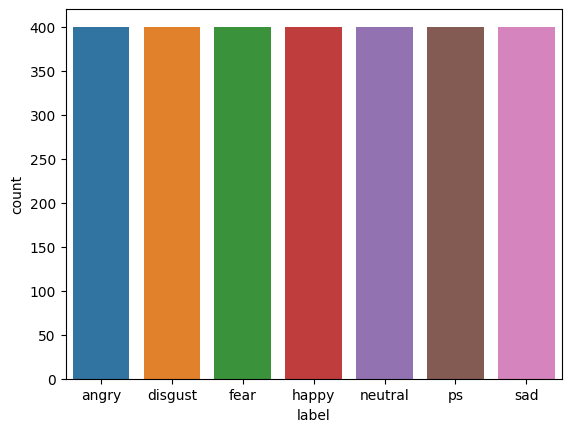

In [9]:
#Exploratory Data Analysis
##could not convert string to float
    ###sns.countplot(df['label'])
##correct code is written as:
sns.countplot(data=df,x='label')


In [10]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(f'Waveform for {emotion}',size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

    
def spectogram(data,sr,emotion):
    x=librosa.stft(data)
    xdb=librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
    plt.colorbar()


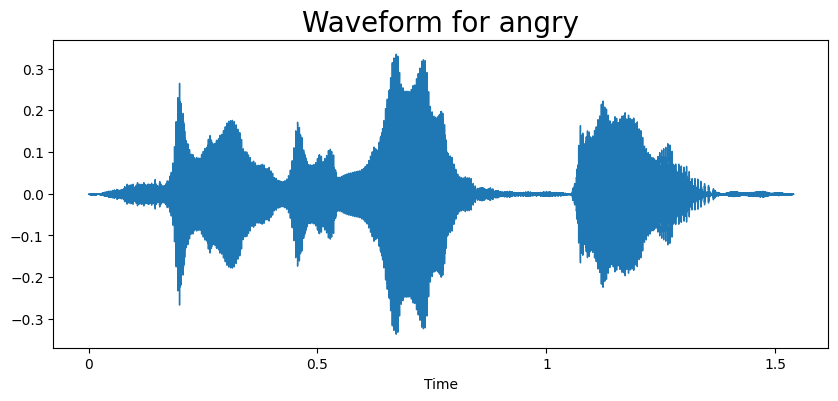

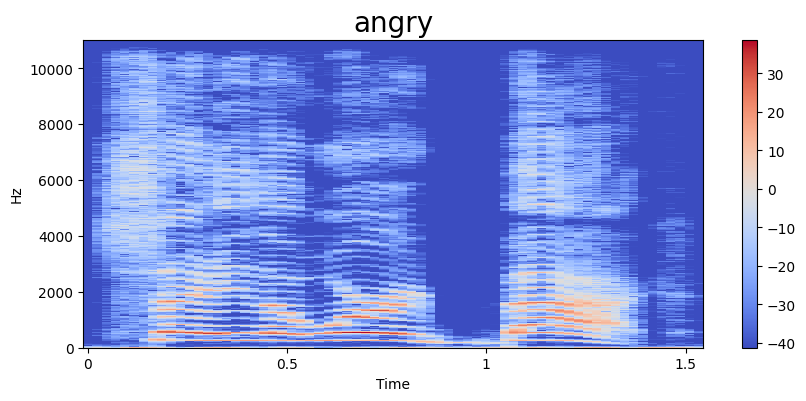

In [11]:
emotion='angry'
path=df['speech'][df['label']==emotion][0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

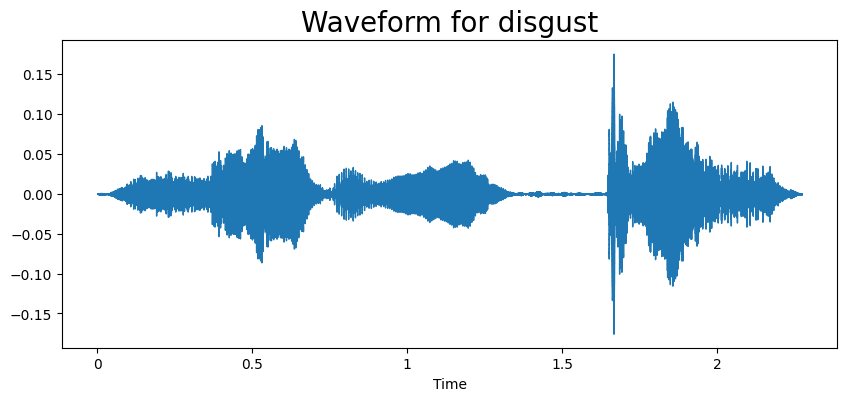

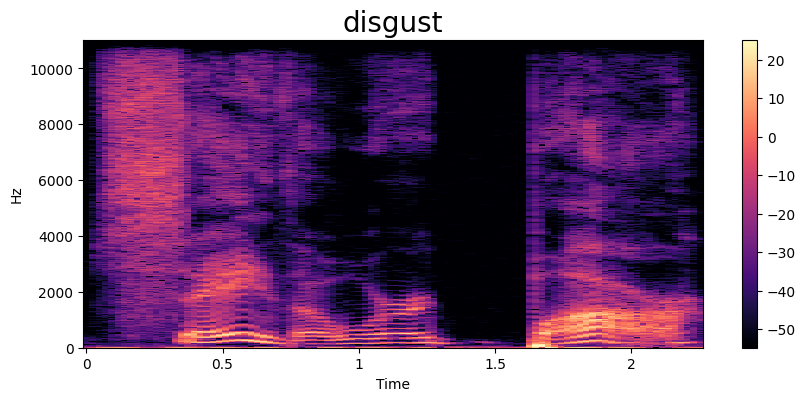

In [12]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[1]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

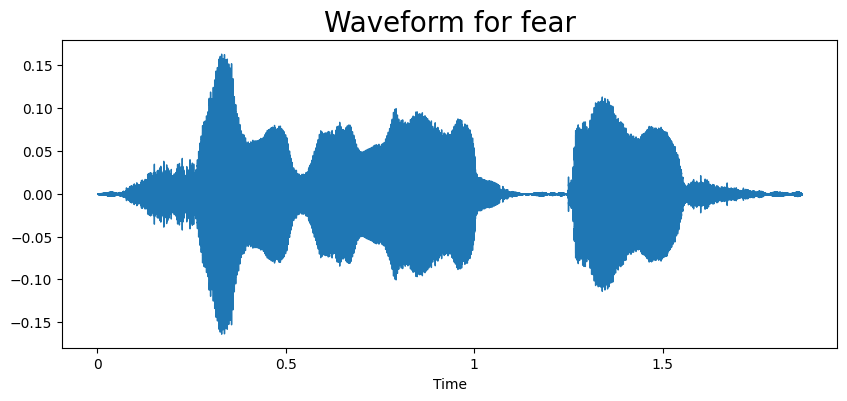

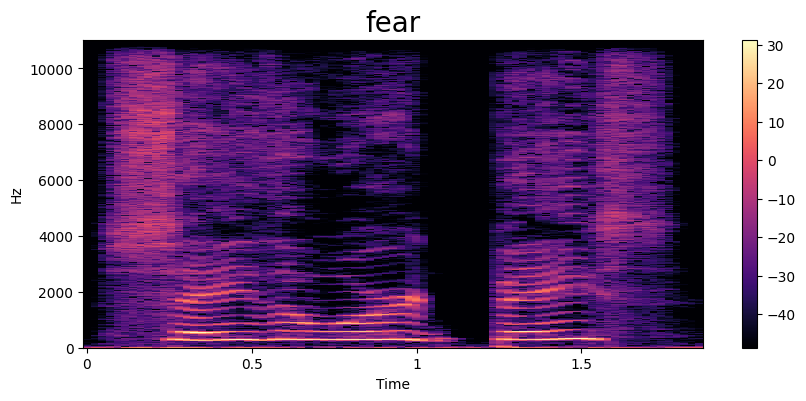

In [13]:
emotion='fear'
path=np.array(df['speech'][df['label']==emotion])[2]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

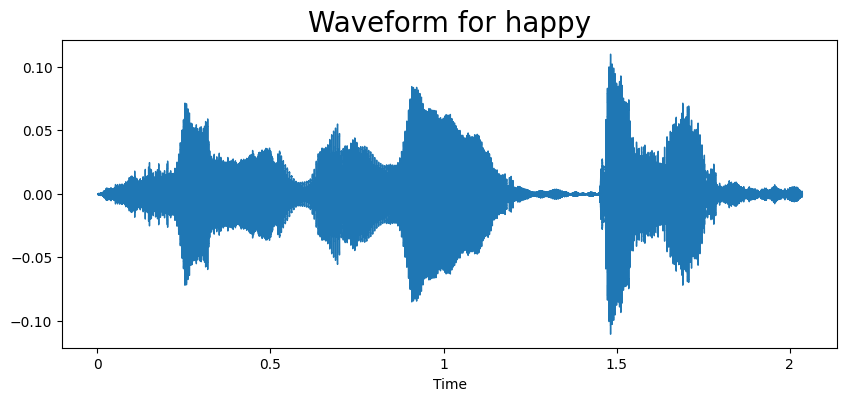

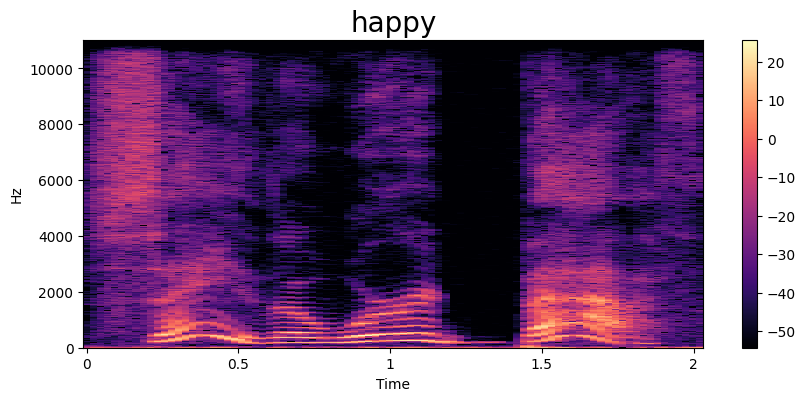

In [14]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[3]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

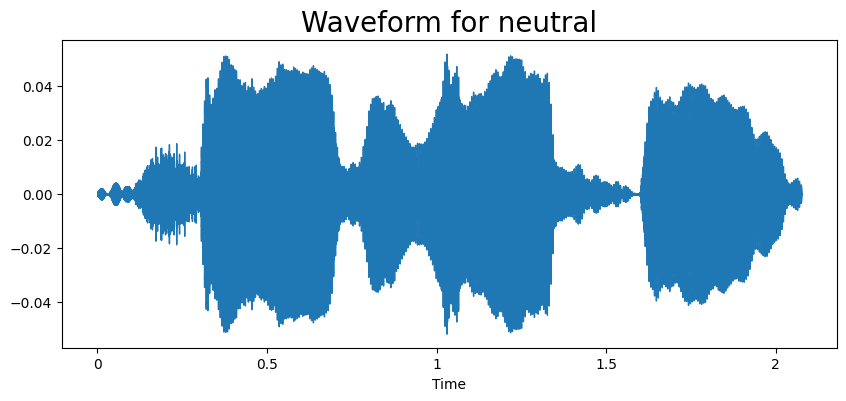

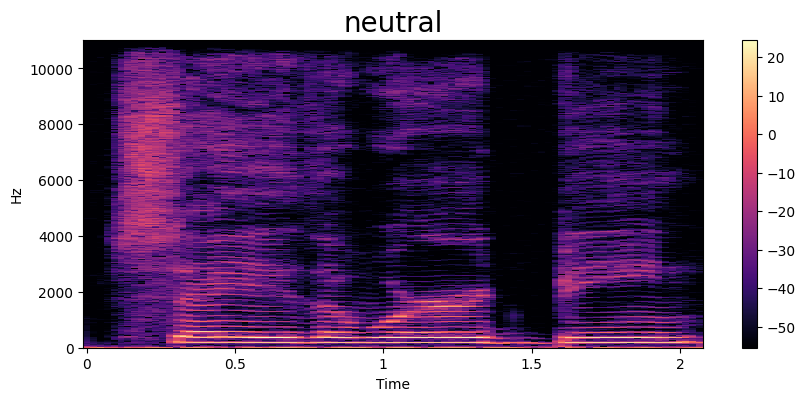

In [15]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[4]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

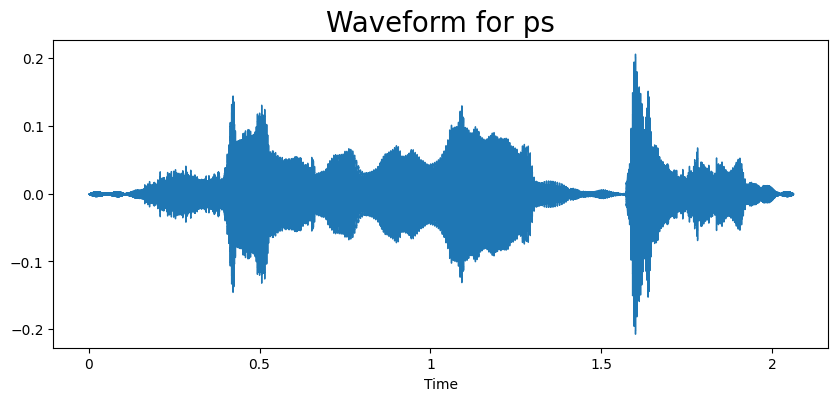

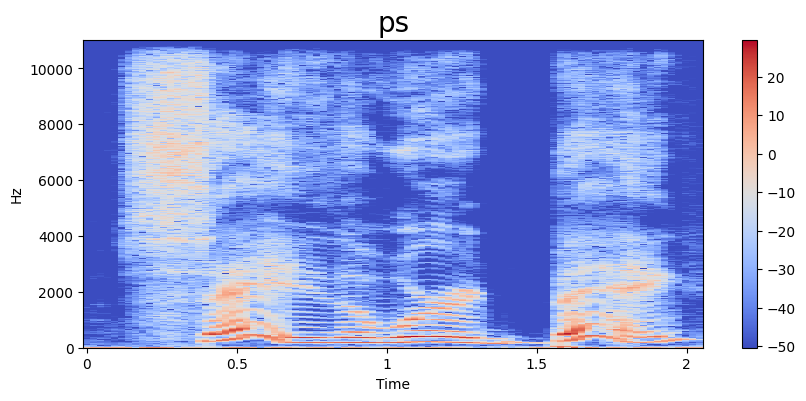

In [16]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[5]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

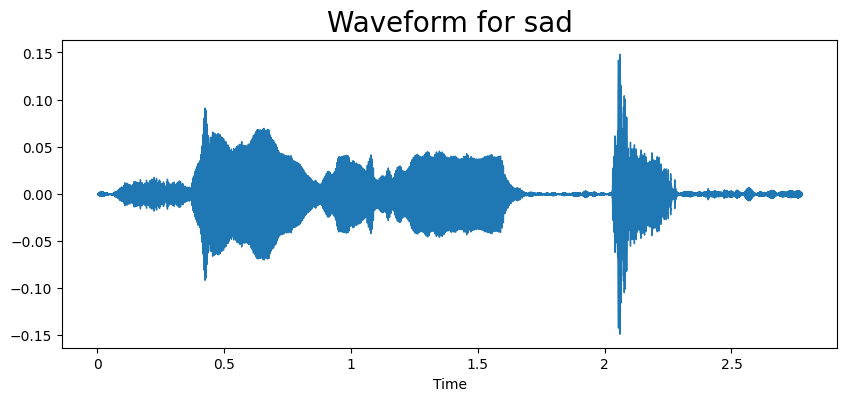

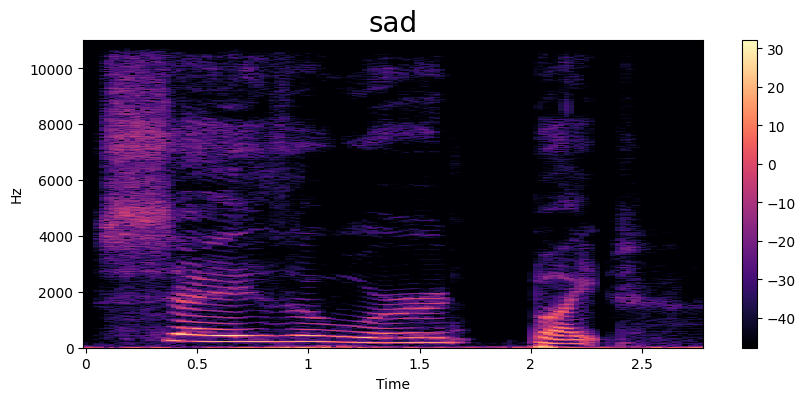

In [17]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[6]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [18]:
#feature extraction
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [19]:
extract_mfcc(df['speech'][0])

array([-3.96986206e+02,  7.74405365e+01, -1.95927906e+01, -2.16666889e+01,
       -2.11275506e+00,  1.00753632e+01, -2.03667068e+01, -6.09244919e+00,
       -7.21228361e+00, -5.57365894e-01, -1.83255327e+00,  2.02101514e-01,
        7.27550924e-01,  1.31773770e+00,  2.88633752e+00,  2.85579133e+00,
       -4.71292162e+00, -4.43651056e+00, -1.62115920e+00, -1.02398405e+01,
       -7.55126286e+00, -1.79688025e+00, -7.03765202e+00,  9.43658447e+00,
        8.35585499e+00,  2.17123604e+01,  1.92169895e+01,  2.03489265e+01,
        1.34133663e+01,  8.33917141e+00,  3.94722492e-01,  5.11131430e+00,
        9.56873894e+00,  5.45486784e+00,  2.50996351e+00, -1.82390726e+00,
        4.86896276e+00,  9.31392288e+00,  2.08915019e+00, -1.90649128e+00],
      dtype=float32)

In [20]:
X_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [21]:
X_mfcc


0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560087, -32.74544, -...
2       [-429.79196, 46.124, 1.5550478, -0.2170951, 2....
3       [-403.46118, 76.32369, -12.531774, -22.288858,...
4       [-434.05756, 77.4455, 10.865499, 16.092943, 8....
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
2797    [-378.50494, 80.91062, 35.30053, 39.74792, -4....
2798    [-434.8618, 89.906364, 28.373262, 39.57707, -2...
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: speech, Length: 2800, dtype: object

In [22]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(2800, 40)

In [23]:
#input split
X=np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [30]:
    #here we have used label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
y_encoded=label_encoder.fit_transform(df['label'])
from keras.utils import to_categorical
y=to_categorical(y_encoded)
y.shape

(2800, 7)

In [25]:
##ANOTHER METHOD
##Here we have used onehot-encoder
#from sklearn.preprocessing import OneHoteEncoder
#enc=OneHoteEncoder()
#y=enc.fit_transform(df[['label']])
#y.toarray
#y.shape

Create the LSTM Model


In [26]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

model=Sequential([
    LSTM(123,return_sequences=False,input_shape=(40,1)),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(32,activation='relu'),
    Dropout(0.2),
    Dense(7,activation='softmax')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 123)               61500     
                                                                 
 dense (Dense)               (None, 64)                7936      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 231       
                                                                 
Total params: 71747 (280.26 KB)
Trainable params: 71747 

In [27]:
#train the model
history=model.fit(X,y,validation_split=0.2,epochs=100,batch_size=512,shuffle=True)

Epoch 1/100
5/5 [==============================] - 3s 237ms/step - loss: 1.9121 - accuracy: 0.2094 - val_loss: 1.9696 - val_accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 1s 121ms/step - loss: 1.7524 - accuracy: 0.3103 - val_loss: 2.0933 - val_accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 1s 125ms/step - loss: 1.5656 - accuracy: 0.4219 - val_loss: 2.2793 - val_accuracy: 0.0089
Epoch 4/100
5/5 [==============================] - 1s 120ms/step - loss: 1.3234 - accuracy: 0.5183 - val_loss: 2.4397 - val_accuracy: 0.2839
Epoch 5/100
5/5 [==============================] - 1s 125ms/step - loss: 1.1325 - accuracy: 0.5705 - val_loss: 2.5336 - val_accuracy: 0.3464
Epoch 6/100
5/5 [==============================] - 1s 116ms/step - loss: 0.9857 - accuracy: 0.6281 - val_loss: 2.6419 - val_accuracy: 0.3321
Epoch 7/100
5/5 [==============================] - 1s 119ms/step - loss: 0.8502 - accuracy: 0.6871 - val_loss: 2.6356 - val_accuracy: 0.3143
Epoch

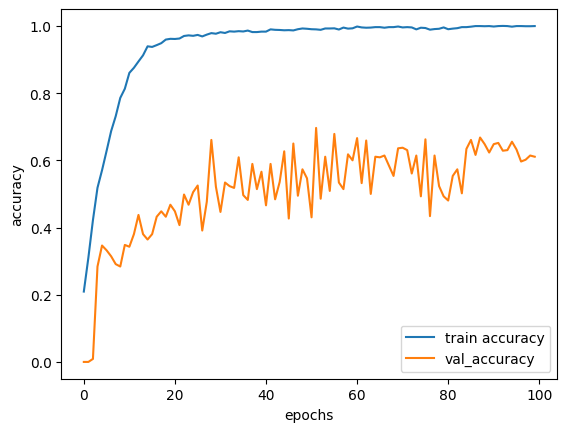

In [28]:
#plot the results
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


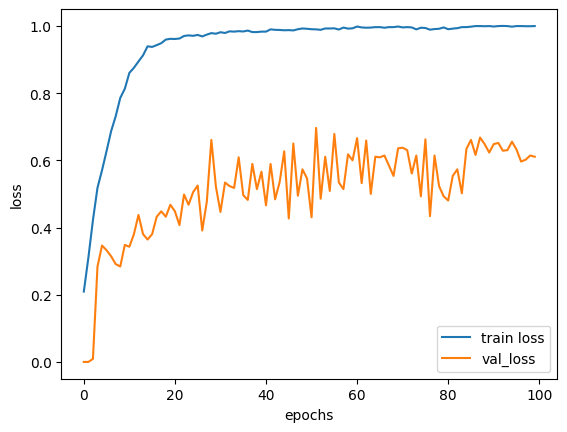

In [29]:

loss=history.history['accuracy']
val_loss=history.history['val_accuracy']

plt.plot(epochs,acc,label='train loss')
plt.plot(epochs,val_acc,label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()
